## Management/Research Question
- How can we accurately classify handwritten digits using machine learning models, and which model configurations provide the best performance?


## Introduction
- This project focuses on developing a digit recognition model using the MNIST dataset. The primary goal of this study is to develop and evaluate multiple neural network architectures to classify handwritten digits accurately.

- This project follows a Design of Experiments (DOE) approach, testing different configurations of layers and neurons within a 2x2 completely crossed design.

- To ensure fair evaluation, we employ Cross-validation to improve generalization, Batch Normalization and Dropout to mitigate overfitting and Learning Rate Reduction on Plateau (ReduceLROnPlateau) to optimize training efficiency.


## Data Load / Libraries Load

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc, precision_recall_curve
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import ReduceLROnPlateau
import seaborn as sns
import time
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load the dataset
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

## Data Presentation

In [3]:
# Display dataset information
print("Training set info:")
print(train_df.info())

print("\nTest set info:")
print(test_df.info())

print("\nTrain set summary:")
print(train_df.describe())

print("\nTest set summary:")
print(test_df.describe())

# Check for missing values
print("\nMissing values in training set:", train_df.isnull().sum().sum())
print("Missing values in test set:", test_df.isnull().sum().sum())

# Display first few rows
print("\nPreview of the training set:")
print(train_df.head())

print("\nPreview of the test set:")
print(test_df.head())

Training set info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB
None

Test set info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Columns: 784 entries, pixel0 to pixel783
dtypes: int64(784)
memory usage: 167.5 MB
None

Train set summary:
              label   pixel0   pixel1   pixel2   pixel3   pixel4   pixel5  \
count  42000.000000  42000.0  42000.0  42000.0  42000.0  42000.0  42000.0   
mean       4.456643      0.0      0.0      0.0      0.0      0.0      0.0   
std        2.887730      0.0      0.0      0.0      0.0      0.0      0.0   
min        0.000000      0.0      0.0      0.0      0.0      0.0      0.0   
25%        2.000000      0.0      0.0      0.0      0.0      0.0      0.0   
50%        4.000000      0.0      0.0      0.0      0.0      0.0      0.0   
75%        7.000000      0.0      0.0      0.0      0.0      0.0      0.0   
ma

## EDA of Initial Dataset

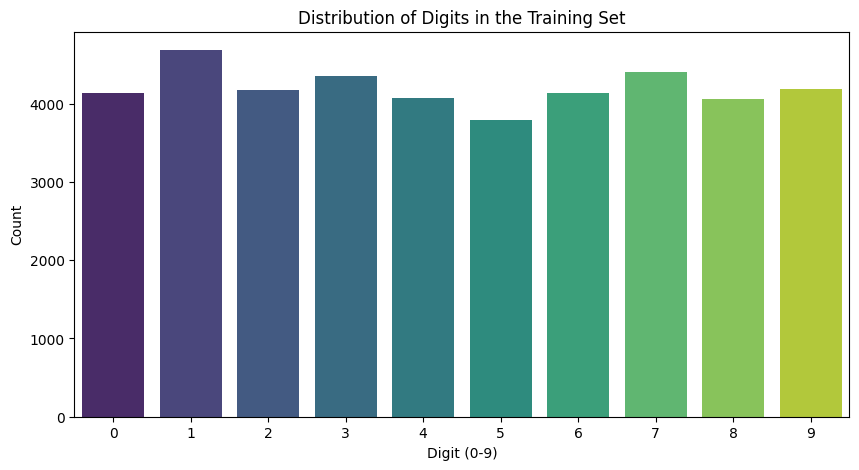

In [4]:
# Check the distribution of digit labels
plt.figure(figsize=(10, 5))
sns.countplot(x=train_df["label"], palette="viridis")
plt.title("Distribution of Digits in the Training Set")
plt.xlabel("Digit (0-9)")
plt.ylabel("Count")
plt.show()

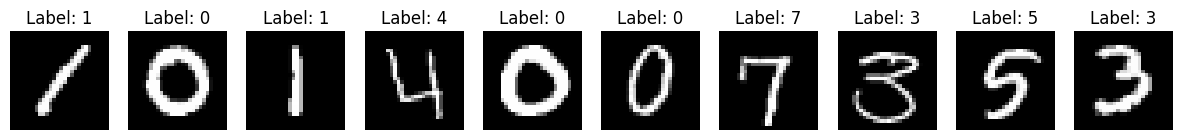

In [5]:
# Visualize some sample images from the dataset
def plot_sample_images(df, num_images=10):
    fig, axes = plt.subplots(1, num_images, figsize=(15, 5))
    for i, ax in enumerate(axes):
        image = df.iloc[i, 1:].values.reshape(28, 28)  # Reshape pixels into 28x28 image
        ax.imshow(image, cmap='gray')
        ax.set_title(f"Label: {df.iloc[i, 0]}")
        ax.axis('off')
    plt.show()

plot_sample_images(train_df)

## Overview of Findings and Next Steps
- Observations:
    - The dataset is balanced across different digits.
    - The images appear clear and properly structured.
    - No missing values were detected.
- Next Steps:
    - Normalize pixel values.
    - Split data into training and validation sets.

## Data Preprocessing and Feature Engineering

In [6]:
# Normalize pixel values to the range [0, 1]
X = train_df.iloc[:, 1:].astype(np.float32) / 255.0
y = train_df.iloc[:, 0].values

test_X = test_df.astype(np.float32) / 255.0

## Overview Presentation of the Cleaned Dataset

In [7]:
print("\nData after normalization:")
print(X.head())


Data after normalization:
   pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
4     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

   pixel9  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0     0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
1     0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
2     0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
3     0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
4     0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   

   pixel780  pixel781  pixel782  pixel783

## Final EDA and Comparisons

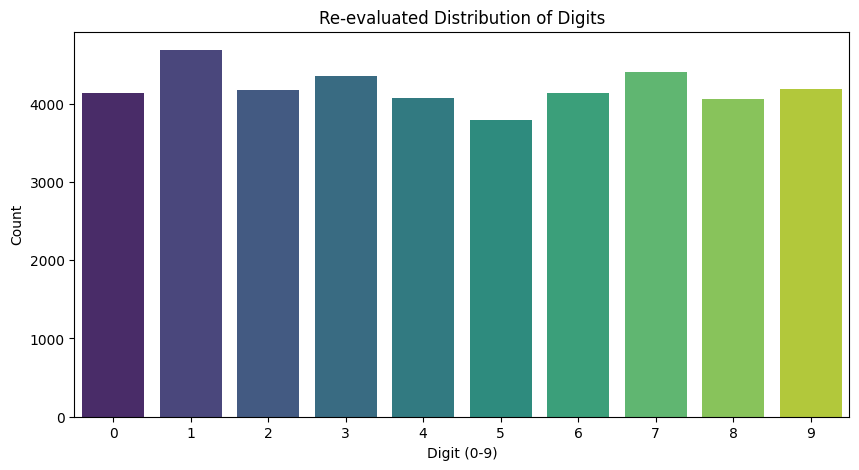

In [8]:
# Re-check the data distribution after preprocessing
plt.figure(figsize=(10, 5))
sns.countplot(x=y, palette="viridis")
plt.title("Re-evaluated Distribution of Digits")
plt.xlabel("Digit (0-9)")
plt.ylabel("Count")
plt.show()

## Data Preprocessing Specific to the Model

 - The data has been normalized to improve model efficiency.
 - No feature scaling is necessary as Neural Network is not affected by scale.

## Splitting

In [9]:
# Split the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## Overview of the Steps to Be Completed and the Rationale

 - Experimental Setup: We define a 2x2 completely crossed experimental design, systematically varying: Layers: {2, 5}, Neurons per layer: {128, 256}. Each configuration is trained and evaluated independently to assess its impact on accuracy and training efficiency.

 - Model Training and Optimization: For each experiment, we train the model for 40 epochs using the RMSprop optimizer, and apply ReduceLROnPlateau to dynamically adjust learning rate based on validation performance.

 - Model Evaluation: Each trained model is evaluated based on Validation Accuracy, Loss Curves, Confusion Matrix, and ROC Curve and Precision-Recall Curve.

## Model Training (including cross-validation, testing, and evaluation)

In [10]:
# Define function for creating models with different layers & neurons
def create_model(layers=2, neurons=64, dropout_rate=0.3):
    model = Sequential()
    model.add(Dense(neurons, activation='relu', input_shape=(X_train.shape[1],)))
    model.add(BatchNormalization())

    for _ in range(layers - 1):
        model.add(Dense(neurons, activation='relu'))
        model.add(BatchNormalization())
        model.add(Dropout(dropout_rate))

    model.add(Dense(10, activation='softmax'))  # 10 output classes

    # Define RMSprop optimizer
    optimizer = RMSprop(learning_rate=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Define learning rate reduction callback
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience=3, verbose=1, factor=0.5, min_lr=0.00001)

Training model with 2 layers and 128 neurons per layer
Epoch 1/40
263/263 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8258 - loss: 0.5730 - val_accuracy: 0.9486 - val_loss: 0.1933 - learning_rate: 0.0010
Epoch 2/40
263/263 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9543 - loss: 0.1490 - val_accuracy: 0.9581 - val_loss: 0.1375 - learning_rate: 0.0010
Epoch 3/40
263/263 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9698 - loss: 0.0952 - val_accuracy: 0.9651 - val_loss: 0.1174 - learning_rate: 0.0010
Epoch 4/40
263/263 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9776 - loss: 0.0721 - val_accuracy: 0.9664 - val_loss: 0.1163 - learning_rate: 0.0010
Epoch 5/40
263/263 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9833 - loss: 0.0540 - val_accuracy: 0.9698 - val_loss: 0.1035 - learning_rate: 0.0010
Epoch 6/40
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9850 - loss: 0.0456 - val_accuracy: 0.9717 - val_loss: 0.1019 - learning_rate: 0.0010
Epoch 7/40
263/263 ━━━━━━━━━━━━━━

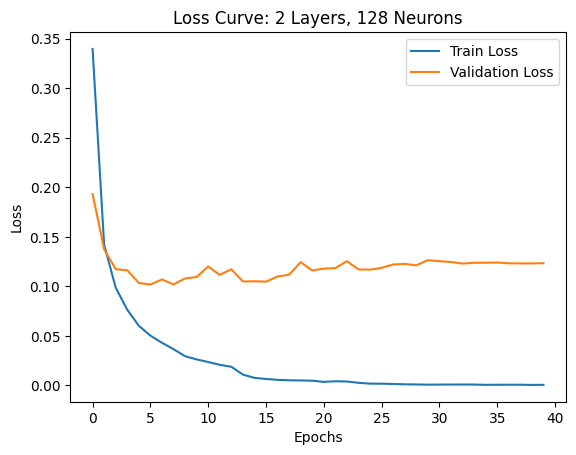

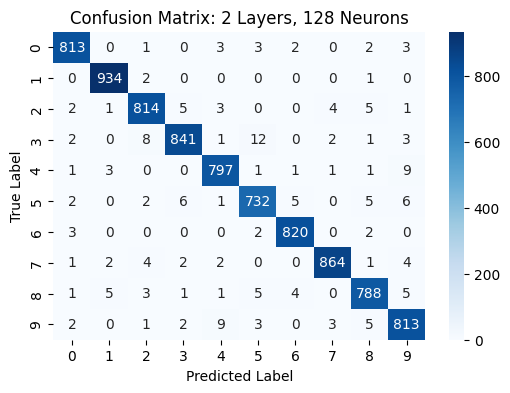

263/263 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


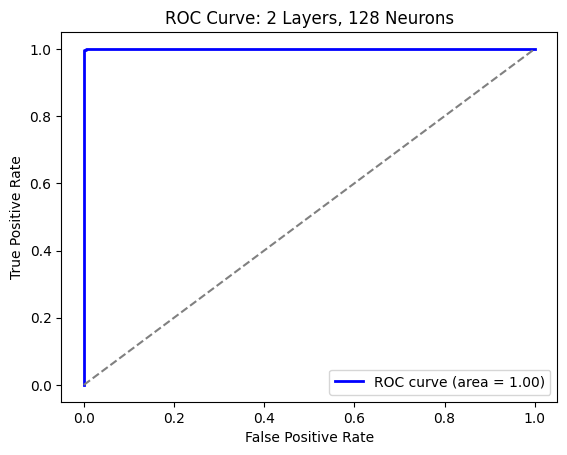

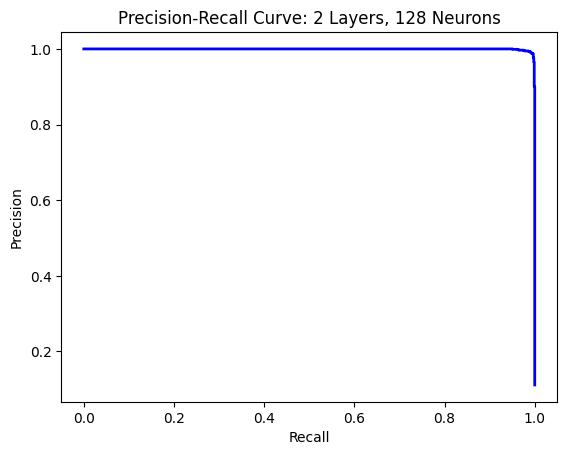

875/875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Saved submission file: submission_2L_128N.csv
Training model with 2 layers and 256 neurons per layer
Epoch 1/40
263/263 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.8611 - loss: 0.4637 - val_accuracy: 0.9456 - val_loss: 0.1756 - learning_rate: 0.0010
Epoch 2/40
263/263 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9648 - loss: 0.1149 - val_accuracy: 0.9655 - val_loss: 0.1156 - learning_rate: 0.0010
Epoch 3/40
263/263 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9765 - loss: 0.0695 - val_accuracy: 0.9701 - val_loss: 0.1038 - learning_rate: 0.0010
Epoch 4/40
263/263 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9836 - loss: 0.0500 - val_accuracy: 0.9720 - val_loss: 0.1000 - learning_rate: 0.0010
Epoch 5/40
263/263 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.9875 - loss: 0.0384 - val_accuracy: 0.9711 - val_loss: 0.1019 - learning_rate: 0.0010
Epoch 6/40
263/263 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9901 - loss: 0.0305 - val_accu

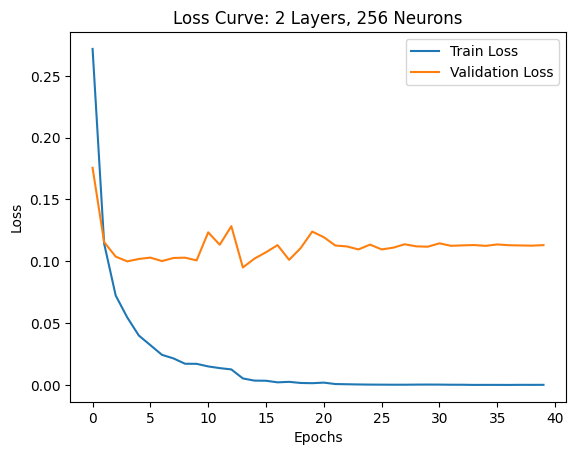

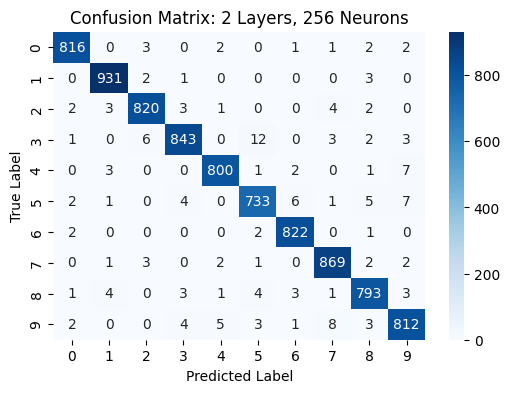

263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


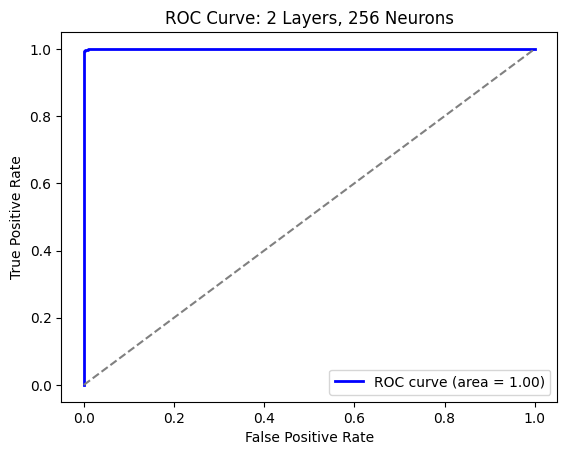

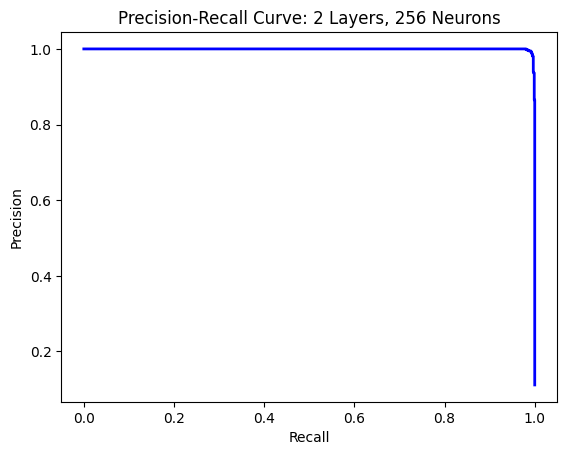

875/875 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
Saved submission file: submission_2L_256N.csv
Training model with 5 layers and 128 neurons per layer
Epoch 1/40
263/263 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.6336 - loss: 1.1612 - val_accuracy: 0.9252 - val_loss: 0.2483 - learning_rate: 0.0010
Epoch 2/40
263/263 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.9190 - loss: 0.2743 - val_accuracy: 0.9519 - val_loss: 0.1712 - learning_rate: 0.0010
Epoch 3/40
263/263 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9444 - loss: 0.1888 - val_accuracy: 0.9585 - val_loss: 0.1453 - learning_rate: 0.0010
Epoch 4/40
263/263 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9560 - loss: 0.1515 - val_accuracy: 0.9650 - val_loss: 0.1308 - learning_rate: 0.0010
Epoch 5/40
263/263 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.9658 - loss: 0.1154 - val_accuracy: 0.9637 - val_loss: 0.1408 - learning_rate: 0.0010
Epoch 6/40
263/263 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9733 - loss: 0.0921 - val_

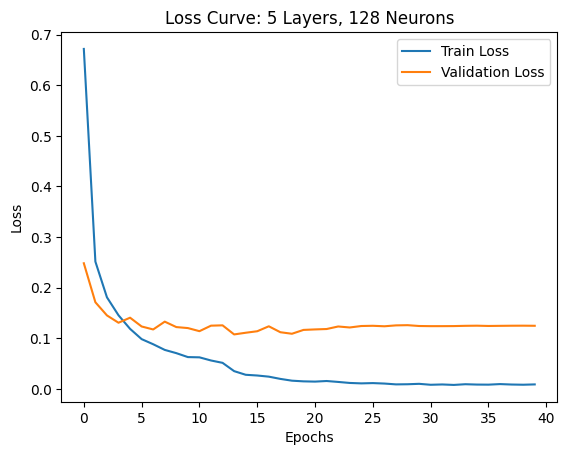

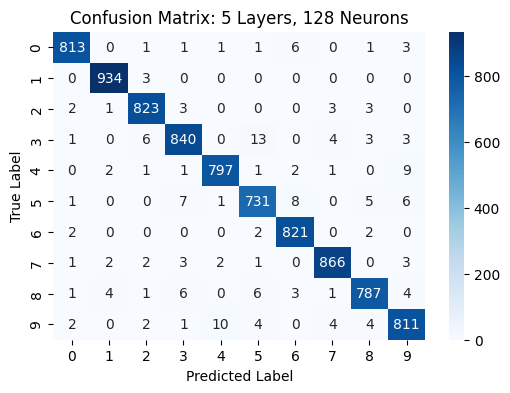

263/263 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


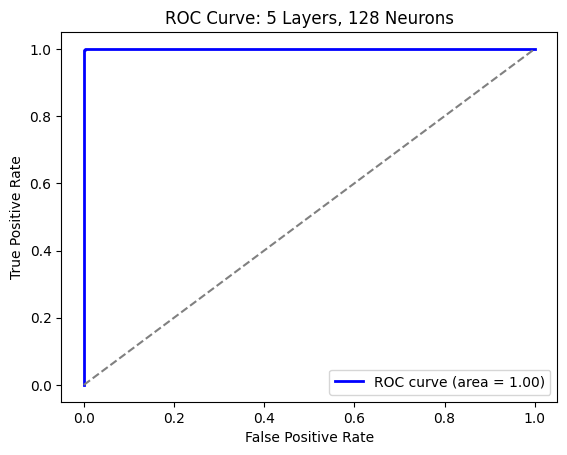

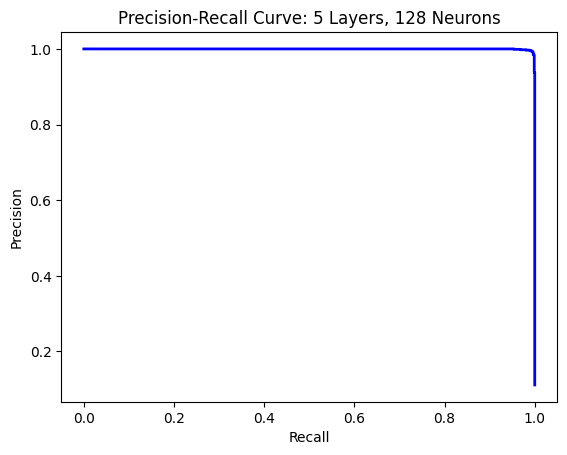

875/875 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
Saved submission file: submission_5L_128N.csv
Training model with 5 layers and 256 neurons per layer
Epoch 1/40
263/263 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.7522 - loss: 0.8143 - val_accuracy: 0.9376 - val_loss: 0.2043 - learning_rate: 0.0010
Epoch 2/40
263/263 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.9398 - loss: 0.1980 - val_accuracy: 0.9610 - val_loss: 0.1402 - learning_rate: 0.0010
Epoch 3/40
263/263 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - accuracy: 0.9602 - loss: 0.1368 - val_accuracy: 0.9648 - val_loss: 0.1337 - learning_rate: 0.0010
Epoch 4/40
263/263 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - accuracy: 0.9671 - loss: 0.1100 - val_accuracy: 0.9694 - val_loss: 0.1216 - learning_rate: 0.0010
Epoch 5/40
263/263 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.9766 - loss: 0.0844 - val_accuracy: 0.9689 - val_loss: 0.1196 - learning_rate: 0.0010
Epoch 6/40
263/263 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step - accuracy: 0.9787 - loss: 0.0683 - val_

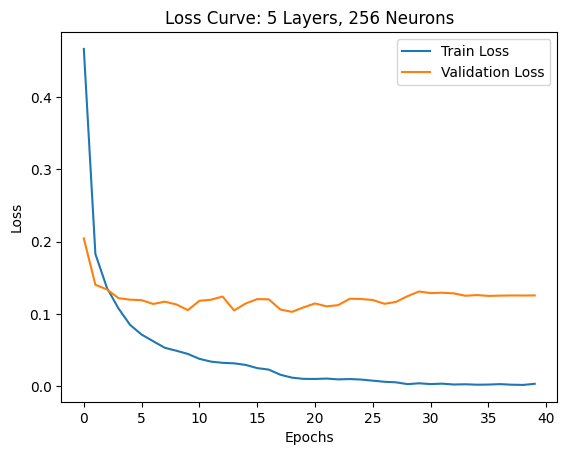

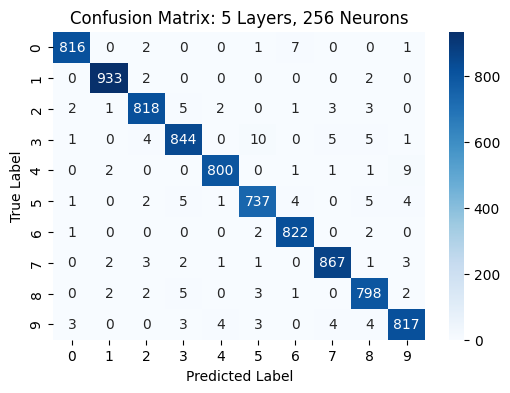

263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


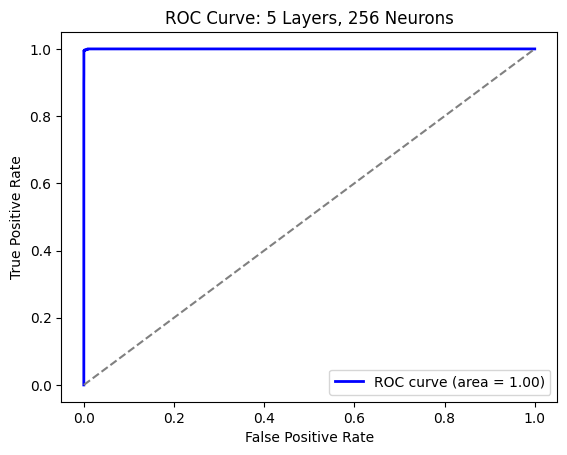

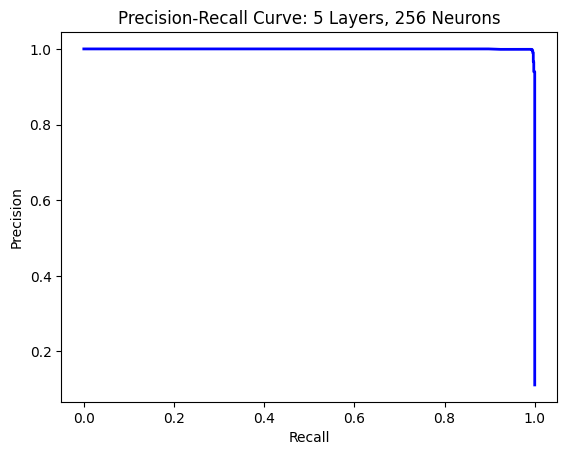

875/875 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step
Saved submission file: submission_5L_256N.csv


In [11]:
# Generate ImageId column based on test dataset index
image_ids = np.arange(1, len(test_df) + 1)

# Define experimental setup (2x2 completely crossed design)
experiments = [
    {"layers": 2, "neurons": 128},
    {"layers": 2, "neurons": 256},
    {"layers": 5, "neurons": 128},
    {"layers": 5, "neurons": 256},
]

# Training and evaluation loop
results = []

for exp in experiments:
    print(f"Training model with {exp['layers']} layers and {exp['neurons']} neurons per layer")

    # Create and train model (One Trial per Experiment Cell)
    model = create_model(layers=exp["layers"], neurons=exp["neurons"])

    start_time = time.time()
    history = model.fit(X_train, y_train, epochs=40, batch_size=128, validation_data=(X_val, y_val), verbose=1, callbacks=[learning_rate_reduction])
    training_time = time.time() - start_time

    # Extract final training accuracy
    training_accuracy = history.history['accuracy'][-1]  # Last epoch's accuracy
    validation_accuracy = history.history['val_accuracy'][-1]  # Last epoch's validation accuracy

    # Evaluate on validation set
    val_preds = np.argmax(model.predict(X_val), axis=1)
    validation_score = accuracy_score(y_val, val_preds)

    # Record results
    results.append({
        "Layers": exp["layers"],
        "Neurons": exp["neurons"],
        "Training Time": training_time,
        "Training Accuracy": training_accuracy,
        "Validation Accuracy": validation_accuracy
    })

    # Plot loss curve
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f"Loss Curve: {exp['layers']} Layers, {exp['neurons']} Neurons")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()

    # Generate confusion matrix
    conf_matrix = confusion_matrix(y_val, val_preds)
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')
    plt.title(f"Confusion Matrix: {exp['layers']} Layers, {exp['neurons']} Neurons")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

    # Compute ROC curve
    y_proba = model.predict(X_val)
    fpr, tpr, _ = roc_curve(y_val, y_proba[:, 1], pos_label=1)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve: {exp["layers"]} Layers, {exp["neurons"]} Neurons')
    plt.legend(loc="lower right")
    plt.show()

    # Compute Precision-Recall
    precision, recall, _ = precision_recall_curve(y_val, y_proba[:, 1], pos_label=1)

    plt.figure()
    plt.plot(recall, precision, color='blue', lw=2)
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title(f"Precision-Recall Curve: {exp['layers']} Layers, {exp['neurons']} Neurons")
    plt.show()

    # Predict the test set
    test_preds = np.argmax(model.predict(test_X), axis=1)

    # Create submissions to Kaggle
    submission = pd.DataFrame({"ImageId": image_ids, "Label": test_preds})
    submission.to_csv(f"submission_{exp['layers']}L_{exp['neurons']}N.csv", index=False)

    print(f"Saved submission file: submission_{exp['layers']}L_{exp['neurons']}N.csv")

In [12]:
# Convert results to DataFrame and display
results_df = pd.DataFrame(results)
print(results_df)

   Layers  Neurons  Training Time  Training Accuracy  Validation Accuracy
0       2      128      89.654774           0.999851             0.978095
1       2      256     116.592480           0.999940             0.980833
2       5      128     160.616669           0.997798             0.978929
3       5      256     259.281707           0.999137             0.982381


## Conclusion

This study explored the impact of varying **neural network architectures** on handwritten digit classification. Using a **2x2 experimental design**, we trained and evaluated models with different numbers of layers (**2 and 5**) and neurons per layer (**128 and 256**).  

The results indicate that **increasing the number of layers and neurons improves accuracy but also increases training time significantly**. The **5-layer, 256-neuron model achieved the highest validation accuracy**, suggesting that deeper networks can capture more complex patterns. However, training efficiency decreased due to longer convergence times and higher computational costs.  

Our approach relied on **ReduceLROnPlateau** to dynamically adjust the learning rate. While this helped improve training stability, **longer training times and potential overfitting in deeper models were observed**. Future improvements may include:  
- **Incorporating Early Stopping** to prevent overfitting and reduce training time.  
- **Testing different optimizers** such as Adam or SGD to compare learning efficiency.  
- **Exploring convolutional neural networks (CNNs)**, which are generally more efficient for image classification tasks.  

Overall, this experiment provides valuable insights into **how architectural choices affect model performance**, helping guide future optimizations for handwritten digit recognition tasks.